<a href="https://colab.research.google.com/github/vaishnavi-1/ML/blob/master/CNN_Model_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


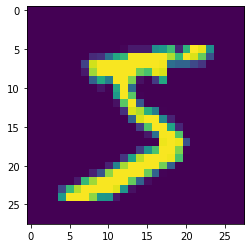

In [3]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [4]:
#check image shape
X_train[0].shape

(28, 28)

In [5]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [6]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [8]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 14s 227us/step - loss: 0.1650 - accuracy: 0.9587 - val_loss: 0.0719 - val_accuracy: 0.9754
Epoch 2/4
60000/60000 [==============================] - 7s 123us/step - loss: 0.0572 - accuracy: 0.9824 - val_loss: 0.0666 - val_accuracy: 0.9801
Epoch 3/4
60000/60000 [==============================] - 7s 124us/step - loss: 0.0406 - accuracy: 0.9876 - val_loss: 0.0911 - val_accuracy: 0.9791
Epoch 4/4
60000/60000 [==============================] - 7s 123us/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.1242 - val_accuracy: 0.9752


In [10]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[6.7076356e-10, 3.9039554e-18, 9.7956434e-09, 7.9903863e-08,
        4.3451541e-18, 1.4380299e-14, 8.3225661e-19, 9.9999988e-01,
        2.0875260e-10, 7.0761183e-12],
       [2.2274586e-15, 6.0644039e-16, 1.0000000e+00, 2.1751264e-14,
        1.5202400e-24, 4.6375186e-23, 2.1008531e-12, 2.4228490e-24,
        2.3919295e-16, 1.1690155e-23],
       [9.8626374e-10, 9.9992514e-01, 7.1943570e-05, 4.2307029e-09,
        5.8216433e-08, 3.5736360e-08, 1.2469813e-07, 9.8730225e-11,
        2.6570815e-06, 1.8724711e-09],
       [1.0000000e+00, 7.3738318e-20, 4.9377430e-08, 6.3211379e-14,
        9.9961806e-17, 5.1768358e-18, 7.6972650e-11, 4.2754115e-16,
        4.8639257e-12, 1.1602598e-14]], dtype=float32)

In [11]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)